In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r'C:\data set\audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df.shape

(10668, 9)

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [5]:
lb = LabelEncoder()
df['model'] = lb.fit_transform(df['model'])
df['transmission'] = lb.fit_transform(df['transmission'])
df['fuelType'] = lb.fit_transform(df['fuelType'])

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


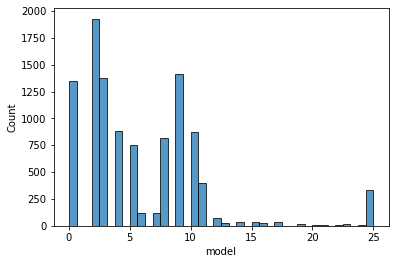

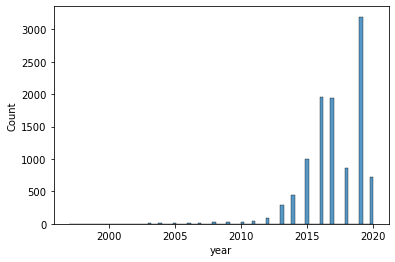

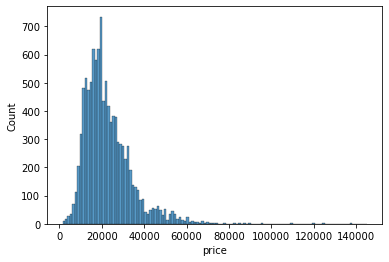

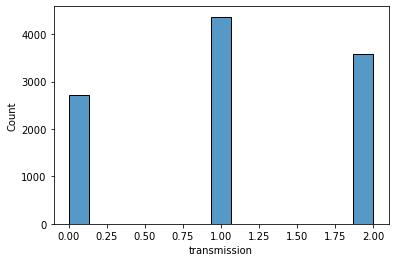

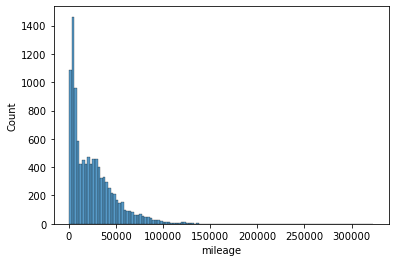

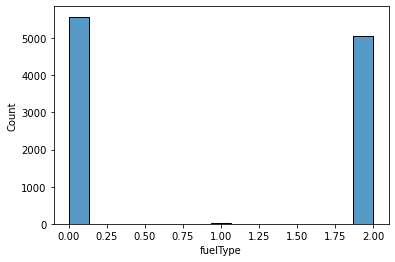

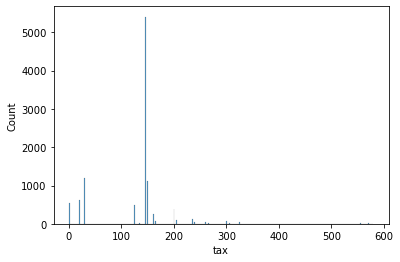

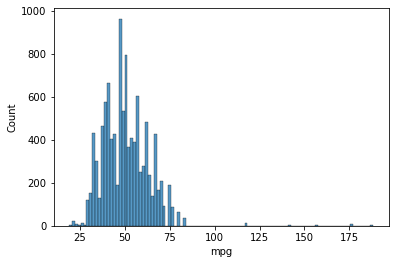

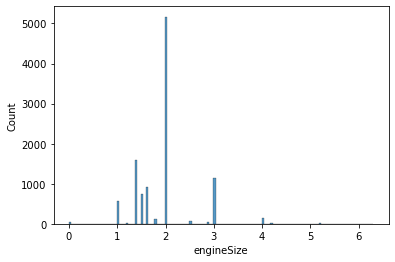

In [7]:
for i in df:
    sns.histplot(df[i])
    plt.show()

df['mileage'] = df[df['mileage']<150000]
df['price'] = df[df['price']<80000]
df['mpg'] = df[df['mpg']<90]

<Figure size 360x360 with 0 Axes>

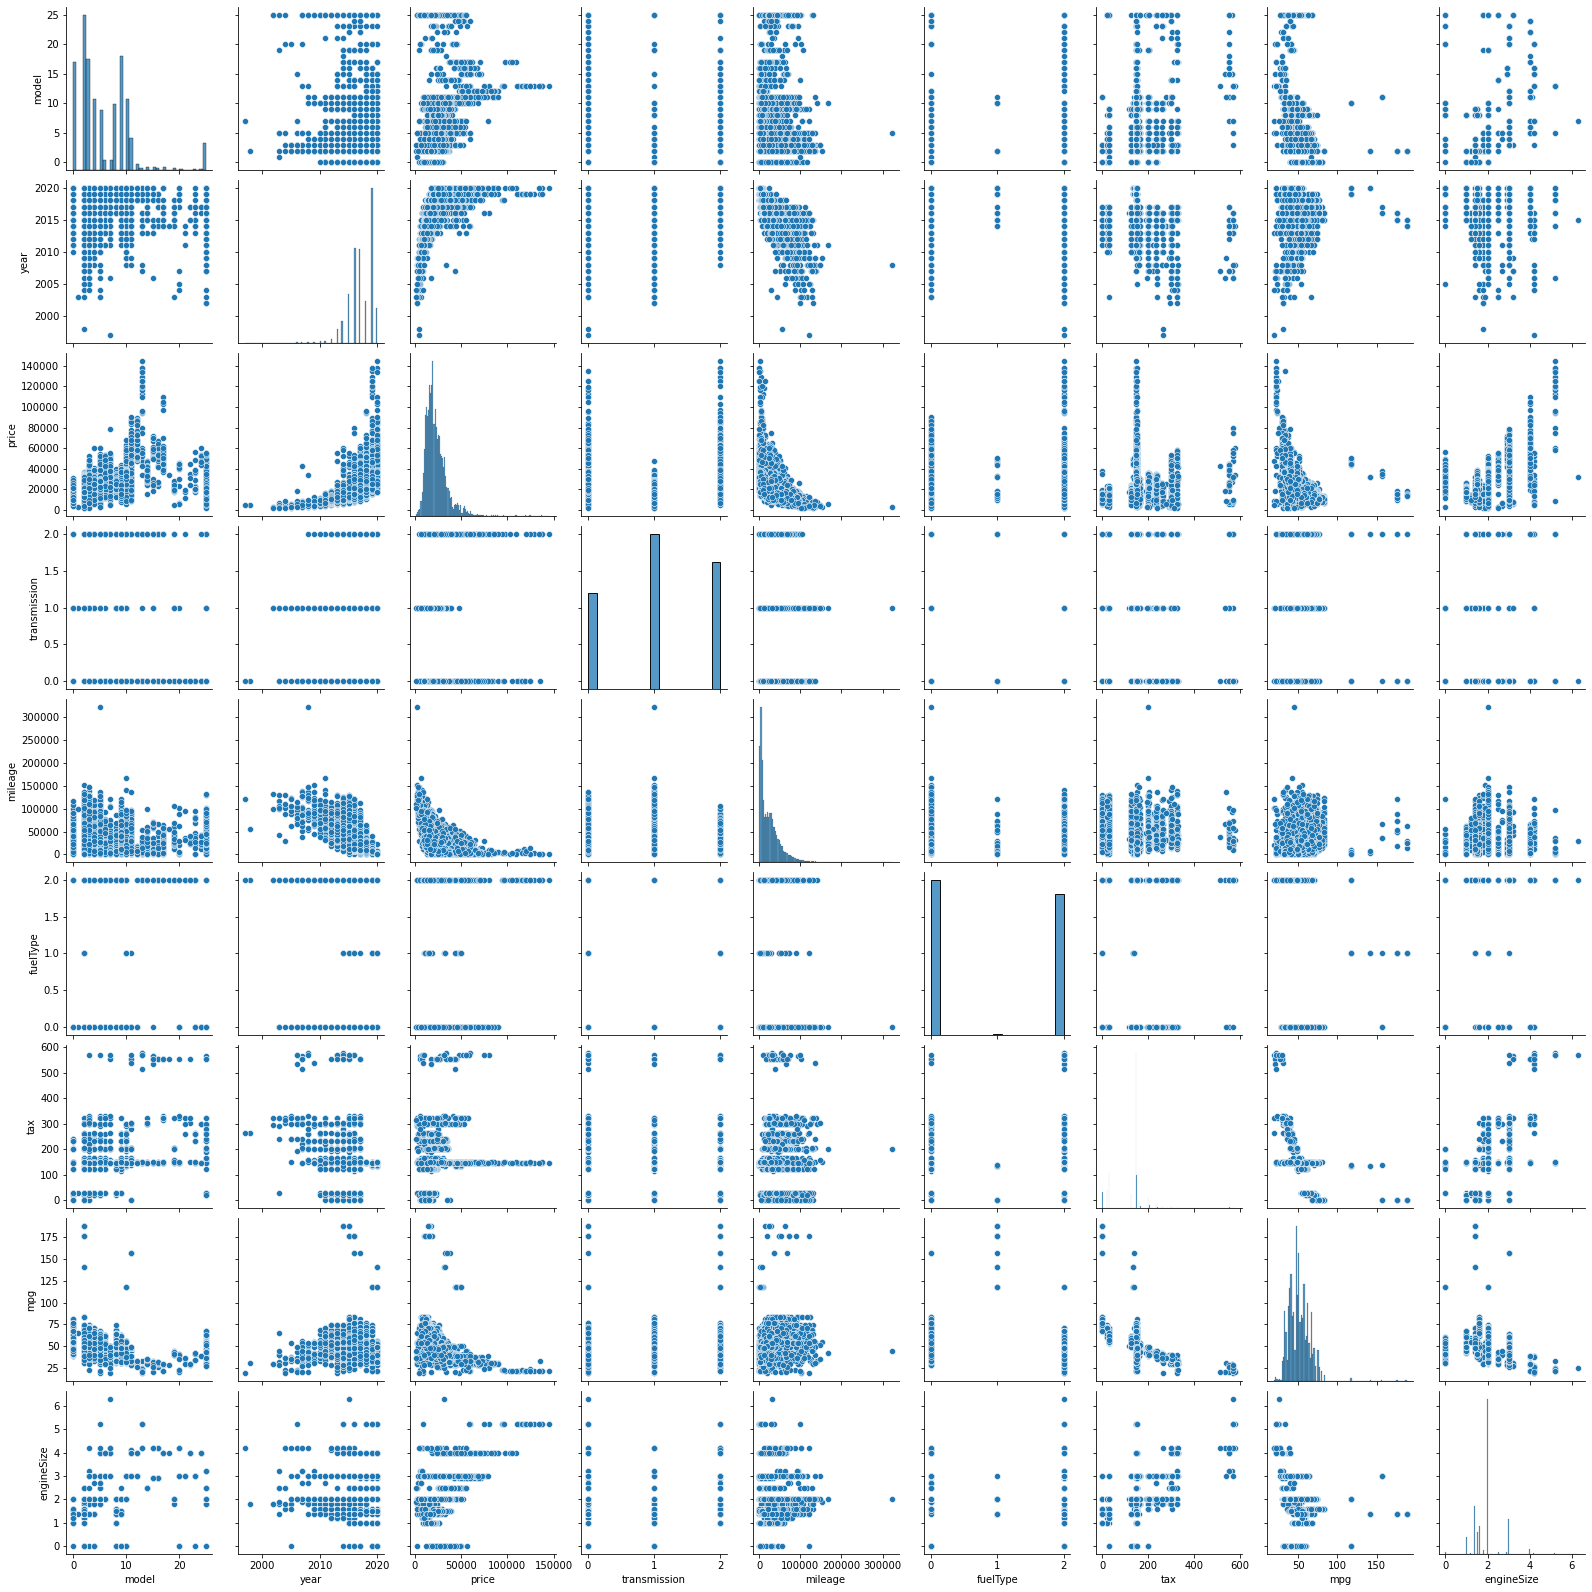

In [8]:
plt.figure(figsize=(5,5))
sns.pairplot(df)

In [9]:
df.shape

(10668, 9)

In [10]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
df.shape

(10668, 9)

In [12]:
df.corr().round(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.0,0.1,0.4,-0.0,-0.1,-0.0,0.4,-0.4,0.4
year,0.1,1.0,0.6,0.0,-0.8,0.1,0.1,-0.4,-0.0
price,0.4,0.6,1.0,0.0,-0.5,-0.0,0.4,-0.6,0.6
transmission,-0.0,0.0,0.0,1.0,-0.0,0.1,-0.0,-0.0,-0.0
mileage,-0.1,-0.8,-0.5,-0.0,1.0,-0.2,-0.2,0.4,0.1
fuelType,-0.0,0.1,-0.0,0.1,-0.2,1.0,0.1,-0.3,-0.4
tax,0.4,0.1,0.4,-0.0,-0.2,0.1,1.0,-0.6,0.4
mpg,-0.4,-0.4,-0.6,-0.0,0.4,-0.3,-0.6,1.0,-0.4
engineSize,0.4,-0.0,0.6,-0.0,0.1,-0.4,0.4,-0.4,1.0


<AxesSubplot:>

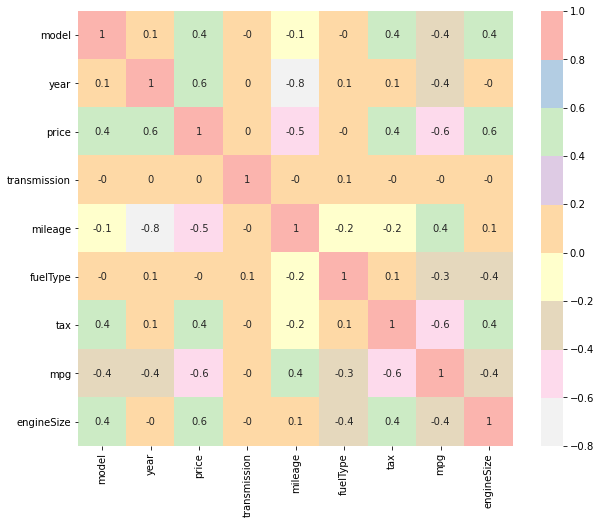

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(1),annot=True,square=True,cmap='Pastel1_r')

In [14]:
import statsmodels.formula.api as smf
model = smf.ols(formula='price ~ model + year + transmission + fuelType + tax + mileage + mpg + engineSize',data=df).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     4921.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:27:55   Log-Likelihood:            -1.0683e+05
No. Observations:               10668   AIC:                         2.137e+05
Df Residuals:                   10659   BIC:                         2.138e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.269e+06   8.17e+04    -52.261      0.000   -4.43e+06   -4.11e+06
model          266.7960     11.595     23.011      0.000     244.069     289.523
year          2122.9837     40.414     52.531      0.000    2043.765    2202.203
transmission  -177.7470     68.903     -2.580      0.010    -312.809     -42.685
fuelType       507.9606     66.698      7.616      0.000     377.221     638.700
tax            -17.6908      1.059    -16.698      0.000     -19.768     -15.614
mileage         -0.0950      0.004    -24.979      0.000      -0.102      -0.088
mpg           -167.3946      6.611    -25.319      0.000    -180.354    -154.435
engineSize    1.091e+04    116.688     93.491      0.000    1.07e+04    1.11e+04
==============================================================================
Omnibus:                     7609.178   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           271818.335
Skew:                           2.998   Prob(JB):                         0.00
Kurtosis:                      26.991   Cond. No.                     5.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
df.describe().round(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10668.0,10668.0,10668.0,10668.0,10668.0,10668.0,10668.0,10668.0,10668.0
mean,5.8,2017.1,22896.7,1.1,24827.2,1.0,126.0,50.8,1.9
std,5.2,2.2,11714.8,0.8,23505.3,1.0,67.2,12.9,0.6
min,0.0,1997.0,1490.0,0.0,1.0,0.0,0.0,18.9,0.0
25%,2.0,2016.0,15130.8,0.0,5968.8,0.0,125.0,40.9,1.5
50%,4.0,2017.0,20200.0,1.0,19000.0,0.0,145.0,49.6,2.0
75%,9.0,2019.0,27990.0,2.0,36464.5,2.0,145.0,58.9,2.0
max,25.0,2020.0,145000.0,2.0,323000.0,2.0,580.0,188.3,6.3


In [17]:
x = df.drop(['price'],axis=1).values
y = df['price'].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=125)

In [19]:
(x_train.shape),(x_test.shape)

((7467, 8), (3201, 8))

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [21]:
x_train.min()

-7.25

In [22]:
x_train.max()

21.75

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
model.predict(x_test).round(0)

array([-4561., 10296., 19718., ..., 15804., 27078.,  9334.])

In [25]:
y_test

array([ 4495, 12794, 17325, ..., 15990, 20500, 12798], dtype=int64)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
r2_score(y_test,model.predict(x_test))

0.7970809552850405

In [28]:
r2_score(y_train,model.predict(x_train))

0.7826844151145346

In [29]:
import seaborn as sns

Text(0, 0.5, 'Actual values')

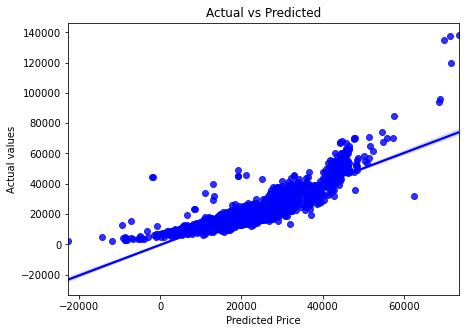

In [30]:
plt.figure(figsize=(7,5))
sns.regplot(x=model.predict(x_test),y=y_test,color='b')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Actual values')

Text(0, 0.5, 'Actual values')

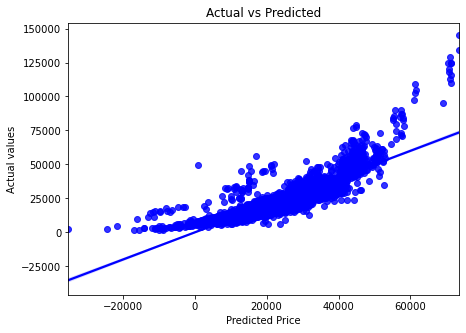

In [31]:
plt.figure(figsize=(7,5))
sns.regplot(x=model.predict(x_train),y=y_train,color='b')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Actual values')